### Perceptron
![](perceptron.png)

### Preliminary 

Understand the following Python expressions and code.

In [1]:
import numpy as np
X = np.array([ [0,0],[0,1],[1,1],[1,0]])

What is the output for each of the following?
-	print(X)
-	print(X[:])
-	print(X[0])
-	print(X[1:])


In [2]:
print(X)
print(X[:])
print(X[0])
print(X[1:])

[[0 0]
 [0 1]
 [1 1]
 [1 0]]
[[0 0]
 [0 1]
 [1 1]
 [1 0]]
[0 0]
[[0 1]
 [1 1]
 [1 0]]


In [3]:
W=np.zeros(1+X.shape[1])
W

array([0., 0., 0.])

In [10]:
W=[0.2, 0.1, 0.4]
np.dot(X,W[1:])  
print(np.dot(X,W[1:]))

[0.  0.4 0.5 0.1]


Verify the output above. Understand how it is being calculated.

In [11]:
y = np.array([[1],[1],[-1],[-1]])
for i,j in zip(X,y):  # X have been defined earlier
    print(i,j)


[0 0] [1]
[0 1] [1]
[1 1] [-1]
[1 0] [-1]


Understand what the zip function does above.

### Perceptrons

In [12]:
import numpy as np
""" perceptron
"""
eta=0.01
epoch=4
X = np.array([ [0,0],[0,1],[1,1],[1,0] ])
y = np.array([[1],[1],[-1],[-1]])


### Question

1. The program below has code missing. They are named FIXME1, FIXME2 and FIXMEFUNCTION. Replace with actual working code. Refer to the lecture notes.
1. What doest w[0] represent?

In [13]:
def activation(output):
    """ Heaviside function
    """
    return np.where(output<=0.0, -1, 1)

def predict(X):
    
    output=activation(np.dot(X,w[1:])+w[0])
    return output

In [14]:
#Q1
#fixed: w as global variable
w=np.zeros(1+X.shape[1])

def train(X,y,eta, epoch):
    
    errors=[]
    for j in range(epoch):
        error=0
        for xi,target in zip(X,y):
            update=eta*(target-predict(xi))
            w[1:]+=update*xi
            w[0]+=update
            print(w)
            error+=int(update!=0.0)
            
        errors.append(error)

In [18]:
train(X,y,0.01,4)

[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]
[ 0.04 -0.04  0.  ]


Q2  
w[0] is bias

Is the prediction accurate? Print out prediction with training data.

In [19]:
for j in range(len(X)):
    print(predict(X[j]))

1
1
-1
-1


In [20]:
#test another
print(predict([0.5,0.5])) 
print(predict([1,0])) 

1
-1


### Question
1. What is the output classification of 

    X=[0.5,0.5]
    
    X=[0.8,0.8]
    
    Is it as you expected? Why or why not?
    
1. Run the boundary map function (given earlier) to display the class regions
1. Test the perceptron with the XOR problem:

    X = np.array([ [0,0],[0,1],[1,1],[1,0] ])
    
    y = np.array([[1],[-1],[1],[-1]])
    
    How does the algorithm perform? Can you give an explanation of its performance


In [21]:
#Q1
print(predict([0.5,0.5]))
print(predict([0.8,0.8]))

#yes

1
1


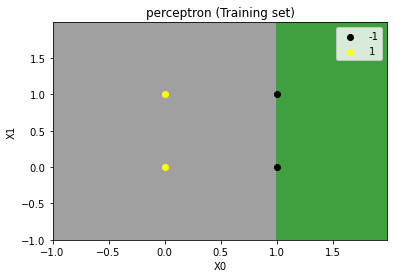

In [22]:
#Q2
from sklearn import datasets
from matplotlib.colors import ListedColormap  
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

X1,X2=np.meshgrid(np.arange(-2,2,0.1),np.arange(-2,2,0.1))

V1=0 #X0
V2=1 #X1

X1, X2 = np.meshgrid(np.arange(-1,2,0.01),  
                     np.arange(-1,2,0.01))  
plt.contourf(X1, X2, predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('green', 'gray'))  )
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y)):  
    plt.scatter(X[y.T[0]==j, V1], X[y.T[0]==j, V2],  
                c = ['black','yellow'][i], label = j)  
plt.title('perceptron (Training set)')  
plt.xlabel('X0')  
plt.ylabel('X1')  
plt.legend()  
plt.show()

In [29]:
#Q3
X = np.array([ [0,0],[0,1],[1,1],[1,0] ])
y = np.array([[1],[-1],[1],[-1]])

train(X,y,0.01,4)

print(predict(X))
print("The performance of this algorithm is not very good, because only 2 of the 4 predicted values, the accuracy rate is only 50%")

[ 0.02 -0.02  0.  ]
[ 0.   -0.02 -0.02]
[0.02 0.   0.  ]
[ 0.   -0.02  0.  ]
[ 0.02 -0.02  0.  ]
[ 0.   -0.02 -0.02]
[0.02 0.   0.  ]
[ 0.   -0.02  0.  ]
[ 0.02 -0.02  0.  ]
[ 0.   -0.02 -0.02]
[0.02 0.   0.  ]
[ 0.   -0.02  0.  ]
[ 0.02 -0.02  0.  ]
[ 0.   -0.02 -0.02]
[0.02 0.   0.  ]
[ 0.   -0.02  0.  ]
[-1 -1 -1 -1]
The performance of this algorithm is not very good, because only 2 of the 4 predicted values, the accuracy rate is only 50%


### Question

1. Test the perceptron on the iris dataset : iris_.csv. This is simplified dataset that has only 2 classes. Use sklearn train_test_split function to separate the dataset. Then write the train function for training. 
1. Write a function that calculate the accuracy of the train and test results. The function should print the number of correct and incorrect prediction.
1. Test out which 2 attributes gives the best answer
1. How would you use the perceptron to classify the full iris dataset?

In [30]:
import pandas as pd
import numpy as np
iris_df=pd.read_csv('iris_.csv',sep=',',header=None)
iris=np.array(iris_df)
X = iris[1:, [1,2]].astype(float)
y = iris[1:,6].astype(float)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

In [32]:
#Q1
w=np.zeros(1+X.shape[1])

def train(X,y,eta, epoch):
    
    errors=[]
    for j in range(epoch):
        error=0
        for xi,target in zip(X,y):
            update=eta*(target-predict(xi))
            w[1:]+=update*xi
            w[0]+=update
            print(w)
            error+=int(update!=0.0)
        errors.append(error)

In [33]:
def activation(output):
    """ Heaviside function
    """
    return np.where(output<=0.0,0, 1)

In [34]:
#train function
train(X_train,y_train,0.01,10)

[0.01  0.067 0.031]
[0.01  0.067 0.031]
[ 0.     0.015 -0.004]
[ 0.     0.015 -0.004]
[-0.01  -0.04  -0.046]
[-0.01  -0.04  -0.046]
[-0.01  -0.04  -0.046]
[-0.01  -0.04  -0.046]
[-0.01  -0.04  -0.046]
[ 0.     0.019 -0.014]
[ 0.     0.019 -0.014]
[ 0.     0.019 -0.014]
[ 0.     0.019 -0.014]
[ 0.     0.019 -0.014]
[-0.01  -0.026 -0.037]
[-0.01  -0.026 -0.037]
[ 0.     0.042 -0.009]
[ 0.     0.042 -0.009]
[-0.01  -0.01  -0.043]
[ 0.     0.045 -0.019]
[-0.01  -0.002 -0.051]
[-0.01  -0.002 -0.051]
[-0.01  -0.002 -0.051]
[ 0.     0.053 -0.027]
[-0.01   0.004 -0.057]
[ 0.     0.058 -0.027]
[ 0.     0.058 -0.027]
[ 0.     0.058 -0.027]
[-0.01   0.012 -0.058]
[-0.01   0.012 -0.058]
[ 0.     0.067 -0.032]
[-0.01   0.018 -0.063]
[-0.01   0.018 -0.063]
[-0.01   0.018 -0.063]
[-0.01   0.018 -0.063]
[ 0.     0.073 -0.038]
[-0.01   0.024 -0.069]
[ 0.    0.08 -0.04]
[ 0.    0.08 -0.04]
[ 0.    0.08 -0.04]
[ 0.    0.08 -0.04]
[-0.01   0.032 -0.074]
[ 0.     0.095 -0.041]
[ 0.     0.095 -0.041]
[ 0.  

Print how many y_test are incorrectly classified

In [35]:
def predict(X):
    output=activation(np.dot(X,w[1:])+w[0])
    return output

In [37]:
#Q2
#accuracy function (X, y) return incorrect-count, correct-count, total
def accuracy(X, y):
        incorrect_count = 0
        for xi, target in zip(X, y):
            output = predict(xi)
            if(target != output):
                incorrect_count += 1
        total_data_count = len(X)
        accuracy = (incorrect_count ,
                    total_data_count - incorrect_count ,
                    total_data_count,
                    (total_data_count - incorrect_count)/total_data_count)
        return accuracy

print("incorrect-count ","correct-count ","total ","correct rate")
print(accuracy(X_train,y_train))
print(accuracy(X_test,y_test))

incorrect-count  correct-count  total  correct rate
(3, 67, 70, 0.9571428571428572)
(1, 29, 30, 0.9666666666666667)


Q3.  
採用 Sepal.Length,Sepal.Width的測試集準確率為0.96  
採用 Sepal.Length,Petal.Length的測試集準確率為1  
採用 Sepal.Length,Petal.Width的測試集準確率為1  
採用 Sepal.Width,Petal.Length的測試集準確率為1  
採用 Sepal.Width,Petal.Width的測試集準確率為0.96  
採用 Petal.Length,Petal.Width的測試集準確率為1  

故除了採用Sepal.Width,Petal.Width這兩個特徵和Sepal.Length,Sepal.Width之外，其他都可以用  

In [38]:
#Q3
X4 = iris[1:, [1,3]].astype(float)
y = iris[1:,6].astype(float)
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split( X4, y, test_size=0.3, random_state=7)
train(X_train4,y_train4,0.01,10)
print(accuracy(X_train4,y_train4))
print(accuracy(X_test4,y_test4))

#測試集準確率為1

[-0.05   0.291 -0.351]
[-0.05   0.291 -0.351]
[-0.06   0.239 -0.366]
[-0.05   0.305 -0.32 ]
[-0.06   0.25  -0.334]
[-0.07  0.2  -0.35]
[-0.08   0.145 -0.363]
[-0.09   0.094 -0.378]
[-0.09   0.094 -0.378]
[-0.08   0.153 -0.33 ]
[-0.07   0.213 -0.29 ]
[-0.06   0.27  -0.249]
[-0.06   0.27  -0.249]
[-0.06   0.27  -0.249]
[-0.07   0.225 -0.262]
[-0.08   0.171 -0.277]
[-0.07   0.239 -0.229]
[-0.07   0.239 -0.229]
[-0.08   0.187 -0.243]
[-0.08   0.187 -0.243]
[-0.09   0.14  -0.259]
[-0.1    0.086 -0.274]
[-0.11   0.032 -0.287]
[-0.1    0.087 -0.25 ]
[-0.1    0.087 -0.25 ]
[-0.09   0.141 -0.205]
[-0.08   0.208 -0.155]
[-0.08   0.208 -0.155]
[-0.09   0.162 -0.17 ]
[-0.1    0.112 -0.182]
[-0.09   0.167 -0.138]
[-0.1    0.118 -0.153]
[-0.11   0.067 -0.169]
[-0.11   0.067 -0.169]
[-0.11   0.067 -0.169]
[-0.1    0.122 -0.129]
[-0.11   0.073 -0.144]
[-0.1    0.129 -0.108]
[-0.1    0.129 -0.108]
[-0.1    0.129 -0.108]
[-0.1    0.129 -0.108]
[-0.11   0.081 -0.127]
[-0.1    0.144 -0.08 ]
[-0.1    0.144

In [39]:
X5 = iris[1:, [1,4]].astype(float)
y = iris[1:,6].astype(float)
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split( X5, y, test_size=0.3, random_state=7)
train(X_train5,y_train5,0.01,10)
print(accuracy(X_train5,y_train5))
print(accuracy(X_test5,y_test5))

#測試集準確率為1

[-0.13   0.065  0.085]
[-0.13   0.065  0.085]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.14   0.

In [40]:
X1 = iris[1:, [2,3]].astype(float)
y = iris[1:,6].astype(float)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=7)
train(X_train1,y_train1,0.01,10)

print(accuracy(X_train1,y_train1))
print(accuracy(X_test1,y_test1))

#測試集準確率為1

[-0.14   0.013  0.083]
[-0.14   0.013  0.083]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.022  0.068]
[-0.15  -0.

In [41]:
X6 = iris[1:, [2,4]].astype(float)
y = iris[1:,6].astype(float)
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split( X6, y, test_size=0.3, random_state=7)
train(X_train5,y_train5,0.01,10)
print(accuracy(X_train6,y_train6))
print(accuracy(X_test6,y_test6))

#測試集準確率為0.96

[-0.14   0.036  0.097]
[-0.14   0.036  0.097]
[-0.15  -0.016  0.095]
[-0.14   0.05   0.108]
[-0.15  -0.005  0.106]
[-0.15  -0.005  0.106]
[-0.15  -0.005  0.106]
[-0.15  -0.005  0.106]
[-0.15  -0.005  0.106]
[-0.15  -0.005  0.106]
[-0.14   0.055  0.116]
[-0.14   0.055  0.116]
[-0.14   0.055  0.116]
[-0.14   0.055  0.116]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.

In [42]:
X2 = iris[1:, [3,4]].astype(float)
y = iris[1:,6].astype(float)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y, test_size=0.3, random_state=7)
train(X_train2,y_train2,0.01,10)
print(accuracy(X_train2,y_train2))
print(accuracy(X_test2,y_test2))

#測試集準確率為1

[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.15   0.01   0.113]
[-0.14   0.045  0.123]
[-0.14   0.045  0.123]
[-0.14   0.045  0.123]
[-0.14   0.